In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

In [2]:
# Подключаем Google Drive
from google.colab import drive

# Монтируем Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/spam2.csv'

df = pd.read_csv(file_path, encoding='latin1')

Mounted at /content/drive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [5]:
# Перейменування колонок для зручності (опціонально)
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Перевірка даних
print(df.head())

# Закодуємо мітки (ham -> 0, spam -> 1)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # ham -> 0, spam -> 1

# Розділення даних на тексти (X) і мітки (y)
X = df['text']
y = df['label']

# Розділення на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [6]:
# 2. Попередня обробка текстів
# Токенізація текстів
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Перетворення текстів у послідовності
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Вирівнювання послідовностей
maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post', truncating='post')

In [7]:
# 3. Створення моделі
model = models.Sequential([
    layers.Embedding(input_dim=5000, output_dim=64),
    layers.LSTM(64, return_sequences=True),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Для бінарної класифікації
])

In [8]:
# 4. Компіляція моделі
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [9]:
# Виведення структури моделі
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 5. Навчання моделі
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.8651 - loss: 0.4413 - val_accuracy: 0.9675 - val_loss: 0.1264
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9821 - loss: 0.0716 - val_accuracy: 0.9753 - val_loss: 0.0805
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.9930 - loss: 0.0328 - val_accuracy: 0.9832 - val_loss: 0.0538
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9982 - loss: 0.0105 - val_accuracy: 0.9877 - val_loss: 0.0452
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9995 - loss: 0.0051 - val_accuracy: 0.9854 - val_loss: 0.0556


In [11]:
# 6. Оцінка на тестовому наборі
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9825 - loss: 0.0649
Test Accuracy: 0.9802690744400024


In [12]:
# 7. Збереження моделі
model.save("spam_classifier_model.h5")
print("Модель збережено!")

Модель збережено!


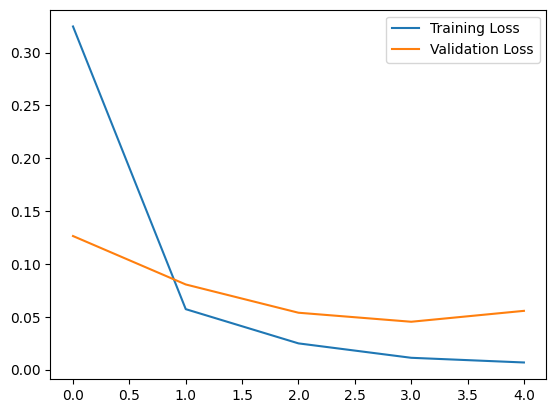

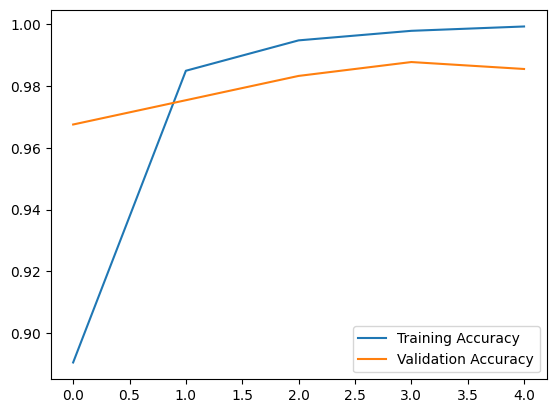

In [13]:
import matplotlib.pyplot as plt

# Графік втрат
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Графік точності
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()